## CA2 - PROGRAMMING FOR DATA ANALYTICS
<font color="green"><b>Assessing the Impact of Low-Carbon Energy on Reducing Emissions and Enhancing Air Quality in Singapore.</b></font>

<u>Objective / Scenario</u>

A young climate analyst, Beatrice, is passionate in finding out how effective low-carbon and renewable energy is effective in decarbonizing emissions in Singapore, and whether it improves the air quality. Currently, Singapore produces significant amounts of emissions, and she wants to investigate if renewable energy is truly the most effective solution in creating a cleaner and clearer Singapore.

### IMPORT DATASETS

1. Import Numpy, Pandas, Matplotlib, Seaborn, StatsModel, Plotly Express, missingno and os.path modules
2. Read all csv files using pd.read_csv and put it into a function called loop_data_files

In [2]:
# Import the required modules
import numpy as np
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os.path
import missingno as mno

# Read all the csv data files using pandas in-built csv read function
def loop_data_files():
    data_files = [['ghgEmissionsData', 'Datasets/ghg-emissions-by-sector.csv', ','],
        ['annualCo2EmissionData', 'Datasets/annual-co2-emissions-per-country.csv', ','],
        ['renewableEnergyData', 'Datasets/renewable-share-energy.csv', ','],
        ['lowCarbonPerCapData', 'Datasets/per-capita-low-carbon-energy.csv', ','],
        ['gdpData', 'Datasets/gdp-level-by-country.csv', ','],
        ['carbonMonoxideData', 'Datasets/air-pollutant-carbon-monoxide.csv', ','],
        ['nitrogenDioxideData', 'Datasets/air-pollutant-nitrogen-dioxide.csv', ','],
        ['ozoneData', 'Datasets/air-pollutant-ozone.csv', ','],
        ['pMData', 'Datasets/air-pollutant-particulate-matter-pm2-5.csv', ','],
        ['sulphurDioxideData', 'Datasets/air-pollutant-sulphur-dioxide.csv', ','],
    ]

    for data in data_files:
        var_name = data[0]
        file_path = data[1]
        sep = data[2]
        globals()[var_name] = pd.read_csv(file_path, sep = sep)

loop_data_files()

### OVERVIEW OF INDIVIDUAL DATASETS
To summarise the individual datasets, use pandas functions .info() to get summarized information of the dataset, and use .head() to display the first 5 rows of the dataset.

<b>This is the raw, unprocessed version of the datasets.</b>

<font color='red'><b>DATA CLEANING AND MERGING IS DONE AFTER MERGING OF THE DATASETS.</b><font>

### DATASET 1 : GREENHOUSE GAS EMISSIONS DATA

In [3]:
# Dataset 1 : GHG Emissions Data
print("Information and Viewing of Dataset 1 :\n")
print(ghgEmissionsData.info())
ghgEmissionsData.head()

Information and Viewing of Dataset 1 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          6150 non-null   object 
 1   Code                            5820 non-null   object 
 2   Year                            6150 non-null   int64  
 3   Agriculture                     6117 non-null   float64
 4   Land-use change and forestry    6147 non-null   float64
 5   Waste                           6090 non-null   float64
 6   Industry                        6150 non-null   float64
 7   Manufacturing and construction  5995 non-null   float64
 8   Transport                       5995 non-null   float64
 9   Electricity and heat            5995 non-null   float64
 10  Buildings                       5995 non-null   float64
 11  Fugitive emissions              6090 non-null   float64

,Entity,Code,Year,Agriculture,Land-use change and forestry,Waste,Industry,Manufacturing and construction,Transport,Electricity and heat,Buildings,Fugitive emissions,Other fuel combustion,Aviation and shipping
0,Afghanistan,AFG,1990,8.070000e+06,-2.390000e+06,1.230000e+06,50000.000745,409999.996424,1.670000e+06,170000.001788,79999.998212,280000.001192,0.0,19999.999553
1,Afghanistan,AFG,1991,8.400000e+06,-2.390000e+06,1.320000e+06,59999.998659,400000.005960,1.550000e+06,170000.001788,70000.000298,239999.994636,0.0,19999.999553
2,Afghanistan,AFG,1992,8.410000e+06,-2.390000e+06,1.400000e+06,59999.998659,370000.004768,7.700000e+05,159999.996424,29999.999329,200000.002980,0.0,19999.999553
3,Afghanistan,AFG,1993,8.490000e+06,-2.390000e+06,1.490000e+06,59999.998659,360000.014305,7.400000e+05,159999.996424,29999.999329,159999.996424,0.0,19999.999553
4,Afghanistan,AFG,1994,8.520000e+06,-2.390000e+06,1.580000e+06,59999.998659,340000.003576,7.100000e+05,159999.996424,19999.999553,119999.997318,0.0,19999.999553


### DATASET 2 : ANNUAL CO2 EMISSIONS DATA

In [4]:
# Dataset 2 : Annual CO2 Emissions Data
print("Information and Viewing of Dataset 2 :\n")
print(annualCo2EmissionData.info())
annualCo2EmissionData.head()

Information and Viewing of Dataset 2 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                31349 non-null  object 
 1   Code                  24974 non-null  object 
 2   Year                  31349 non-null  int64  
 3   Annual CO₂ emissions  31349 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 979.8+ KB
None


,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


### DATASET 3 : RENEWABLE ENERGY DATA

In [5]:
# Dataset 3 : Renewable Energy Data
print("Information and Viewing of Dataset 3 :\n")
print(renewableEnergyData.info())
renewableEnergyData.head()

Information and Viewing of Dataset 3 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5603 non-null   object 
 1   Code                                      4292 non-null   object 
 2   Year                                      5603 non-null   int64  
 3   Renewables (% equivalent primary energy)  5603 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 175.2+ KB
None


,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747495
1,Africa,NaN,1966,6.122062
2,Africa,NaN,1967,6.325731
3,Africa,NaN,1968,7.005293
4,Africa,NaN,1969,7.956088


### DATASET 4 : LOW-CARBON ENERGY PER CAPITA DATA

In [6]:
# Dataset 4 : Low Carbon Per Capita Data
print("Information and Viewing of Dataset 4 :\n")
print(lowCarbonPerCapData.info())
lowCarbonPerCapData.head()

Information and Viewing of Dataset 4 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           4862 non-null   object 
 1   Code                                             4292 non-null   object 
 2   Year                                             4862 non-null   int64  
 3   Low-carbon energy per capita (kWh - equivalent)  4862 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 152.1+ KB
None


,Entity,Code,Year,Low-carbon energy per capita (kWh - equivalent)
0,Africa,NaN,1965,127.91771
1,Africa,NaN,1966,139.12256
2,Africa,NaN,1967,141.57660
3,Africa,NaN,1968,161.39375
4,Africa,NaN,1969,183.53687


### DATASET 5 : GDP, PPP DATA

In [7]:
# Dataset 5 : GDP Data
print("Information and Viewing of Dataset 5 :\n")
print(gdpData.info())
gdpData.head()

Information and Viewing of Dataset 5 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    8397 non-null   object 
 1   Code                                      7097 non-null   object 
 2   Year                                      8397 non-null   int64  
 3   GDP, PPP (constant 2017 international $)  6169 non-null   float64
 4   Annual CO₂ emissions                      7919 non-null   float64
 5   Annual consumption-based CO₂ emissions    4600 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 393.7+ KB
None


,Entity,Code,Year,"GDP, PPP (constant 2017 international $)",Annual CO₂ emissions,Annual consumption-based CO₂ emissions
0,Afghanistan,AFG,1990,NaN,2024326.1,NaN
1,Afghanistan,AFG,1991,NaN,1914301.0,NaN
2,Afghanistan,AFG,1992,NaN,1482054.0,NaN
3,Afghanistan,AFG,1993,NaN,1486943.0,NaN
4,Afghanistan,AFG,1994,NaN,1453829.0,NaN


### DATASET 6 : CARBON MONOXIDE ATMOSPHERIC LEVELS DATA

In [8]:
# Dataset 6 : Carbon Monoxide Levels Data
print("Information and Viewing of Dataset 6 :\n")
print(carbonMonoxideData.info())
carbonMonoxideData.head()

Information and Viewing of Dataset 6 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               22 non-null     int64  
 1   co_max_8hour_mean  22 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
None


,Year,co_max_8hour_mean
0,2000,3.7
1,2001,4.2
2,2002,2.7
3,2003,3.2
4,2004,2.8


### DATASET 7 : NITROGEN MONOXIDE ATMOSPHERIC LEVELS DATA

In [9]:
# Dataset 7 : Nitrogen Dioxide Levels Data
print("Information and Viewing of Dataset 7 :\n")
print(nitrogenDioxideData.info())
nitrogenDioxideData.head()

Information and Viewing of Dataset 7 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Year                   22 non-null     int64
 1   nitrogen_dioxide_mean  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes
None


,Year,nitrogen_dioxide_mean
0,2000,30
1,2001,26
2,2002,27
3,2003,24
4,2004,26


### DATASET 8 : OZONE ATMOSPHERIC LEVELS DATA

In [10]:
# Dataset 8 : Ozone Levels Data
print("Information and Viewing of Dataset 8 :\n")
print(ozoneData.info())
ozoneData.head()

Information and Viewing of Dataset 8 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Year                      22 non-null     int64
 1   ozone_maximum_8hour_mean  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes
None


,Year,ozone_maximum_8hour_mean
0,2000,112
1,2001,133
2,2002,131
3,2003,118
4,2004,146


### DATASET 9 : PARTICULATE MATTER 2.5 LEVELS DATA

In [11]:
# Dataset 9 : PM 2.5 Data
print("Information and Viewing of Dataset 9 :\n")
print(pMData.info())
pMData.head()

Information and Viewing of Dataset 9 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        20 non-null     int64
 1   pm2.5_mean  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes
None


,Year,pm2.5_mean
0,2002,23
1,2003,19
2,2004,21
3,2005,21
4,2006,23


### DATASET 10 : SULPHUR DIOXIDE ATMOSPHERIC LEVELS DATA

In [12]:
# Dataset 10 : Sulphur Dioxide Data
print("Information and Viewing of Dataset 10 :\n")
print(sulphurDioxideData.info())
sulphurDioxideData.head()

Information and Viewing of Dataset 10 :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  22 non-null     int64
 1   sulphur_dioxide_mean  22 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes
None


,Year,sulphur_dioxide_mean
0,2000,22
1,2001,22
2,2002,18
3,2003,15
4,2004,14


### MERGING AND WRANGLING DATA

Merging Data into a Final Dataset :

1. Merge all the imported datasets using .merge() on Year column
2. Drop unused columns using .drop(columns=[])

Wrangling Data :

1. For datasets that contained data for more than one country, filter out data to only retrieve rows for Singapore
                     dataset_name.loc[dataset_name[column_name] == 'value']
2. Rename the columns in the merged dataset to ensure consistency in the dataset
3. Retrieve data rows only from 2005 onwards (Datasets from Data.gov.sg only contained data from 2005 onwards)
                     mergedDataset[mergedDataset.Year > 2004]
4. Since GDP, PPP contained very large values, use pandas function to_numeric to convert the values to numerical values, and downcast to convert the values into integers.

###### Preview the first 5 rows of the merged dataset.

In [13]:
# Wrangling and Merging the datasets

# Only retrieve rows for data in Singapore
annualCo2EmissionData = annualCo2EmissionData.loc[annualCo2EmissionData['Entity'] == 'Singapore']
ghgEmissionsData = ghgEmissionsData.loc[ghgEmissionsData['Entity'] == 'Singapore']
gdpData = gdpData.loc[gdpData['Entity'] == 'Singapore']
renewableEnergyData = renewableEnergyData.loc[renewableEnergyData['Entity'] == 'Singapore']
lowCarbonPerCapData = lowCarbonPerCapData.loc[lowCarbonPerCapData['Entity'] == 'Singapore']

# Merge the datasets together
mergedDataset = gdpData.drop(columns=['Entity', 'Code', 'Annual CO₂ emissions', 'Annual consumption-based CO₂ emissions']).merge(renewableEnergyData.drop(columns=['Entity', 'Code']), on ='Year').merge(lowCarbonPerCapData.drop(columns=['Entity', 'Code'])).merge(ghgEmissionsData.drop(columns=['Entity', 'Code', 'Land-use change and forestry']), on = 'Year').merge(annualCo2EmissionData.drop(columns=['Entity', 'Code']), on = 'Year').merge(carbonMonoxideData, on = 'Year').merge(nitrogenDioxideData, on = 'Year').merge(ozoneData, on = 'Year').merge(pMData, on = 'Year').merge(sulphurDioxideData, on = 'Year')

# Renaming column names
mergedDataset.columns = ['Year', 'GDP, PPP', 'Renewables (% Equivalent Primary Energy)', 'Low-Carbon Energy Per Capita (kWh)', 'Agriculture', 'Waste', 'Industry', 'Manufacturing and Construction', 'Transport', 'Electricity and Heat', 'Buildings', 'Fugitive Emissions', 'Other Fuel Combustion', 'Aviation and Shipping', 'Annual CO2 Emissions', 'Mean Carbon Monoxide Level (8h)', 'Mean Nitrogen Monoxide Level (24h)', 'Mean Ozone Level (8h)', 'Mean PM2.5 Level (24h)', 'Mean Sulphur Dioxide Level (24h)']

# Converting GDP Scientific Notation Values to Integers
mergedDataset['GDP, PPP'] = pd.to_numeric(mergedDataset['GDP, PPP'], downcast = 'integer')

# Retrieve rows of data only from 2005 onwards
mergedDataset = mergedDataset[mergedDataset.Year > 2004]

# Preview of the merged dataset
mergedDataset.reset_index().drop(columns = ['index']).head()

,Year,"GDP, PPP",Renewables (% Equivalent Primary Energy),Low-Carbon Energy Per Capita (kWh),Agriculture,Waste,Industry,Manufacturing and Construction,Transport,Electricity and Heat,Buildings,Fugitive Emissions,Other Fuel Combustion,Aviation and Shipping,Annual CO2 Emissions,Mean Carbon Monoxide Level (8h),Mean Nitrogen Monoxide Level (24h),Mean Ozone Level (8h),Mean PM2.5 Level (24h),Mean Sulphur Dioxide Level (24h)
0,2005,286341693440,0.277619,350.95720,79999.998212,1.790000e+06,1.013000e+07,5.190000e+06,5.730000e+06,2.568000e+07,370000.004768,560000.002384,150000.00596,9.392000e+07,40322320.0,2.4,25,159,21,14
1,2006,312127160320,0.250252,337.08390,90000.003576,1.940000e+06,1.011000e+07,5.440000e+06,5.950000e+06,2.554000e+07,469999.998808,579999.983311,NaN,1.040900e+08,46470510.0,2.6,24,136,23,11
2,2007,340287684608,0.242837,337.89682,70000.000298,2.090000e+06,1.010000e+07,5.740000e+06,6.150000e+06,2.605000e+07,579999.983311,600000.023842,NaN,1.146600e+08,47184990.0,1.7,22,206,19,12
3,2008,346645102592,0.240991,343.83167,59999.998659,2.240000e+06,1.008000e+07,5.960000e+06,6.270000e+06,2.584000e+07,589999.973774,629999.995232,NaN,1.256500e+08,59990670.0,1.6,22,183,16,11
4,2009,347064467456,0.227238,336.67870,39999.999106,2.390000e+06,1.006000e+07,8.590000e+06,6.860000e+06,2.300000e+07,620000.004768,649999.976158,NaN,1.298500e+08,43128944.0,1.9,22,105,19,9


### CHECK FOR MISSING / NA VALUES IN THE MERGED DATASET
From the merged dataset, it is clear the data column 'Other Fuel Combustion' has 10 missing or NA values.

With reference to the merged dataset, we can see that there are rows with the value 'NaN', causing this number to be 10.

In [14]:
# Check merged dataset for NA / NaN Values
print(f"\nChecking for missing or na values in the dataset:\n---------------------------\n{mergedDataset.isnull().sum()}")


Checking for missing or na values in the dataset:
---------------------------
Year                                         0
GDP, PPP                                     0
Renewables (% Equivalent Primary Energy)     0
Low-Carbon Energy Per Capita (kWh)           0
Agriculture                                  0
Waste                                        0
Industry                                     0
Manufacturing and Construction               0
Transport                                    0
Electricity and Heat                         0
Buildings                                    0
Fugitive Emissions                           0
Other Fuel Combustion                       10
Aviation and Shipping                        0
Annual CO2 Emissions                         0
Mean Carbon Monoxide Level (8h)              0
Mean Nitrogen Monoxide Level (24h)           0
Mean Ozone Level (8h)                        0
Mean PM2.5 Level (24h)                       0
Mean Sulphur Dioxide Level (

### CLEANING THE DATASET (REMOVING NAN VALUES)
1. Using fillna(0), the NaN values were converted to zeroes to remove any NA values in the dataset.
2. After removing the NaN values, in the 'Other Fuel Combustion', all values have been converted to 0 which can be seen from na_value_removed.
3. Use mno.matrix to display a BEFORE and AFTER the removal of NaN values from the data column. If all the white spaces are filled, it indicates that there are no longer any missing values.

Before removal of NA values:
3     150000.005960
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14      9999.999776
15      9999.999776
16      9999.999776
17      9999.999776
Name: Other Fuel Combustion, dtype: float64

After removal of NA values:
3     150000.005960
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
10         0.000000
11         0.000000
12         0.000000
13         0.000000
14      9999.999776
15      9999.999776
16      9999.999776
17      9999.999776
Name: Other Fuel Combustion, dtype: float64


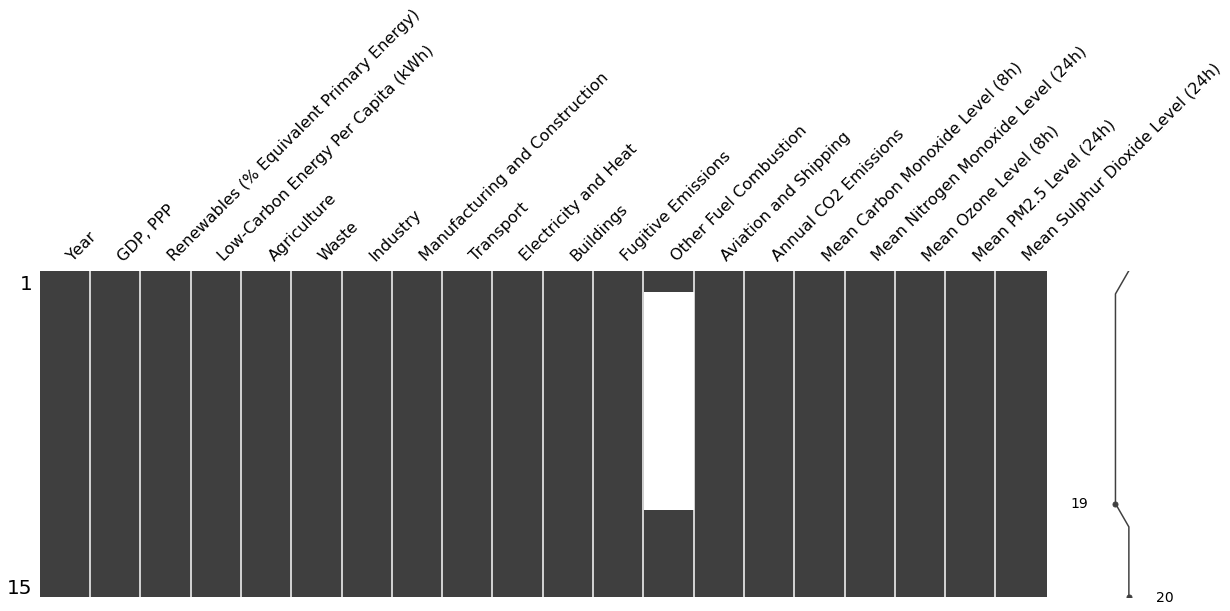

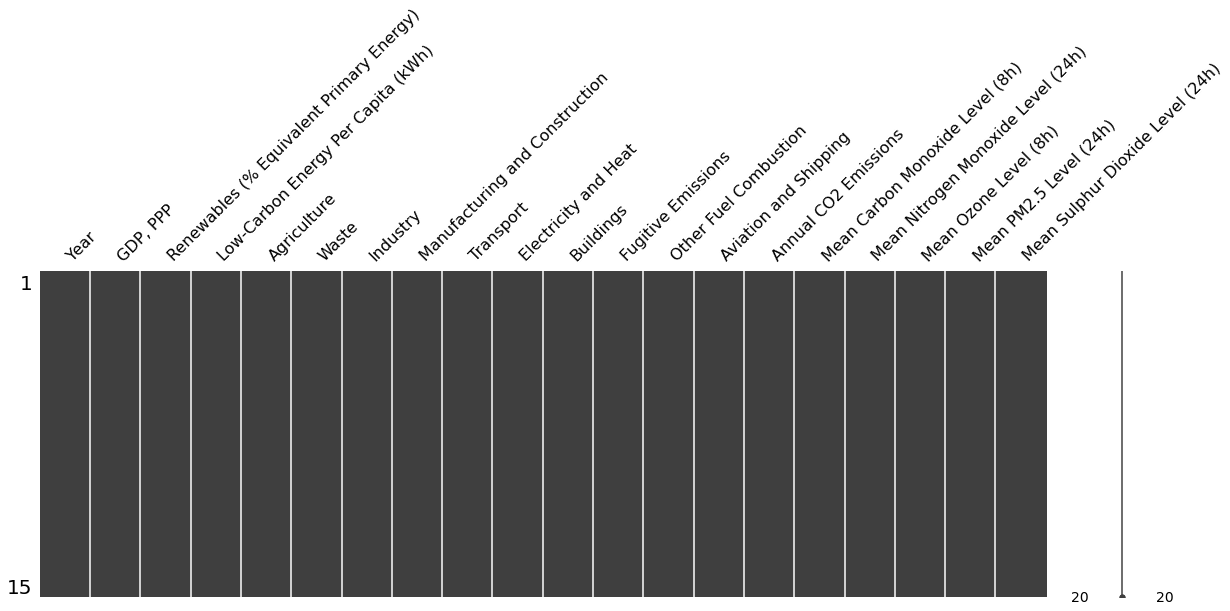

In [15]:
# Function to remove NA values from the dataset
print(f"Before removal of NA values:\n{mergedDataset['Other Fuel Combustion']}")
finalDataset = mergedDataset.fillna(0)
na_value_removed = finalDataset['Other Fuel Combustion']
# All NaN values should have been converted to zeroes
print(f"\nAfter removal of NA values:\n{na_value_removed}")

# Use mno.matrix to check that there are no more missing values
mno.matrix(mergedDataset, figsize = (20, 6))
mno.matrix(finalDataset, figsize = (20, 6))
plt.show()

### PREVIEW OF THE MERGED AND CLEANSED DATASET
In the merged dataset, there is an additional column : index. Using .drop(columns=['index']), the index column was removed.

To reset the indexing of the dataset to 0, use reset_index().

Use pandas function .head() and .tail() to view the first 5 and last 5 rows of the dataset respectively.


In [16]:
# Preview of the merged dataset (with no NaN values)
finalDataset.reset_index().drop(columns = ['index']).head()

,Year,"GDP, PPP",Renewables (% Equivalent Primary Energy),Low-Carbon Energy Per Capita (kWh),Agriculture,Waste,Industry,Manufacturing and Construction,Transport,Electricity and Heat,Buildings,Fugitive Emissions,Other Fuel Combustion,Aviation and Shipping,Annual CO2 Emissions,Mean Carbon Monoxide Level (8h),Mean Nitrogen Monoxide Level (24h),Mean Ozone Level (8h),Mean PM2.5 Level (24h),Mean Sulphur Dioxide Level (24h)
0,2005,286341693440,0.277619,350.95720,79999.998212,1.790000e+06,1.013000e+07,5.190000e+06,5.730000e+06,2.568000e+07,370000.004768,560000.002384,150000.00596,9.392000e+07,40322320.0,2.4,25,159,21,14
1,2006,312127160320,0.250252,337.08390,90000.003576,1.940000e+06,1.011000e+07,5.440000e+06,5.950000e+06,2.554000e+07,469999.998808,579999.983311,0.00000,1.040900e+08,46470510.0,2.6,24,136,23,11
2,2007,340287684608,0.242837,337.89682,70000.000298,2.090000e+06,1.010000e+07,5.740000e+06,6.150000e+06,2.605000e+07,579999.983311,600000.023842,0.00000,1.146600e+08,47184990.0,1.7,22,206,19,12
3,2008,346645102592,0.240991,343.83167,59999.998659,2.240000e+06,1.008000e+07,5.960000e+06,6.270000e+06,2.584000e+07,589999.973774,629999.995232,0.00000,1.256500e+08,59990670.0,1.6,22,183,16,11
4,2009,347064467456,0.227238,336.67870,39999.999106,2.390000e+06,1.006000e+07,8.590000e+06,6.860000e+06,2.300000e+07,620000.004768,649999.976158,0.00000,1.298500e+08,43128944.0,1.9,22,105,19,9


In [17]:
# Preview of the merged dataset (with no NaN values)
finalDataset.reset_index().drop(columns = ['index']).tail()

,Year,"GDP, PPP",Renewables (% Equivalent Primary Energy),Low-Carbon Energy Per Capita (kWh),Agriculture,Waste,Industry,Manufacturing and Construction,Transport,Electricity and Heat,Buildings,Fugitive Emissions,Other Fuel Combustion,Aviation and Shipping,Annual CO2 Emissions,Mean Carbon Monoxide Level (8h),Mean Nitrogen Monoxide Level (24h),Mean Ozone Level (8h),Mean PM2.5 Level (24h),Mean Sulphur Dioxide Level (24h)
10,2015,495491907584,0.292372,482.16104,19999.999553,2.990000e+06,1.273000e+07,1.282000e+07,7.380000e+06,2.489000e+07,610000.014305,9.300000e+05,0.000000,1.643400e+08,56465904.0,3.3,22,152,24,12
11,2016,511987023872,0.289138,489.41788,19999.999553,3.060000e+06,1.336000e+07,1.301000e+07,7.340000e+06,2.542000e+07,610000.014305,9.600000e+05,9999.999776,1.765600e+08,35654384.0,2.2,26,115,15,13
12,2017,535130767360,0.280812,485.78570,19999.999553,3.140000e+06,1.399000e+07,1.544000e+07,7.240000e+06,2.615000e+07,589999.973774,9.800000e+05,9999.999776,1.843700e+08,37156624.0,1.7,25,191,14,12
13,2018,553846833152,0.278422,480.11320,19999.999553,3.220000e+06,1.462000e+07,1.394000e+07,7.080000e+06,2.605000e+07,589999.973774,1.000000e+06,9999.999776,1.830400e+08,46019840.0,2.0,26,150,15,9
14,2019,561297227776,0.299543,501.15323,19999.999553,3.300000e+06,1.524000e+07,1.396000e+07,6.960000e+06,2.614000e+07,569999.992847,1.030000e+06,9999.999776,1.766500e+08,29916560.0,1.7,23,125,16,8


### DESCRIBING THE INFORMATION OF THE FINAL DATASET
- Determine the number of rows and columns in the dataset : use shape[0] for rows and shape[1] for columns.

- Identify the datatype and number of non-null values : use .info() to summarise information on the dataset.

- Ensure the dataset no longer contains NA values : use .isnull().sum() to sum the NA values by column (if any). If values are returned as 0, it indicates that there are no NA values.

- Retrieve the number of unique values for each column in the dataset using nunique().

#### Insights from the Description of the Dataset :
1. The dataset contains 15 rows and 20 columns, with no null values in the dataset.
2. The dataset includes integer and float data.
3. There are no missing or NA values in the dataset (after removing NaN values earlier).

In [18]:
# Information and Description of the Dataset

print("**Assessing the Impact of Low-Carbon Energy on Reducing Emissions and Enhancing Air Quality in Singapore**")
# Extracting the rows and columns of the dataset
print(f"\nThere are {finalDataset.shape[0]} rows and {finalDataset.shape[1]} columns in the merged dataset.\n")

# Extracting the columns and the datatypes
print("Information about the dataset:\n---------------------------")
print(f"{finalDataset.info()}")

# Check for any missing values
print(f"\nChecking for missing or na values in the dataset:\n---------------------------\n{finalDataset.isnull().sum()}")

# Extract the unique values from each column of the dataset
print(f"\nCount of unique values in the dataset columns:\n---------------------------\n{finalDataset.nunique()}")

**Assessing the Impact of Low-Carbon Energy on Reducing Emissions and Enhancing Air Quality in Singapore**

There are 15 rows and 20 columns in the merged dataset.

Information about the dataset:
---------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 3 to 17
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year                                      15 non-null     int64  
 1   GDP, PPP                                  15 non-null     int64  
 2   Renewables (% Equivalent Primary Energy)  15 non-null     float64
 3   Low-Carbon Energy Per Capita (kWh)        15 non-null     float64
 4   Agriculture                               15 non-null     float64
 5   Waste                                     15 non-null     float64
 6   Industry                                  15 non-null     float64
 7   Manufacturing and Constructio

### DESCRIBING NUMERICAL VALUES IN THE DATASET
Using .describe(), it can analyse the values for each column in the dataset and return values for descriptive statistics like count, mean, standard deviation, minimum, quartiles and maximum for each numeric column in the dataframe.

From this table, we can identify if there are any outliers found within the dataset by investigating if there is a big difference between the lower quartile value (25%) and upper quartile value (75%). 

<b>In 'Other Fuel Combustion', there could be a possibility of an outlier, as the lower quartile value of 0 is significantly lower than the upper quartile value of 9999.999776 in terms of emissions.</b>

In [19]:
# Describing the dataset
print(f"\nSummarising the numerical values for the merged dataset excluding 'Year' column:")
finalDataset.drop(columns=['Year']).describe()


Summarising the numerical values for the merged dataset excluding 'Year' column:


,"GDP, PPP",Renewables (% Equivalent Primary Energy),Low-Carbon Energy Per Capita (kWh),Agriculture,Waste,Industry,Manufacturing and Construction,Transport,Electricity and Heat,Buildings,Fugitive Emissions,Other Fuel Combustion,Aviation and Shipping,Annual CO2 Emissions,Mean Carbon Monoxide Level (8h),Mean Nitrogen Monoxide Level (24h),Mean Ozone Level (8h),Mean PM2.5 Level (24h),Mean Sulphur Dioxide Level (24h)
count,1.500000e+01,15.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,1.500000e+01,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000
mean,4.330596e+11,0.262873,407.663241,39999.999603,2.650667e+06,1.173533e+07,1.031733e+07,6.802000e+06,2.549467e+07,581333.329280,7.860000e+05,12666.667004,1.479640e+08,4.533638e+07,2.313333,23.933333,145.333333,18.200000,11.400000
std,9.096500e+10,0.024017,65.256019,24201.535229,4.758221e+05,1.842587e+06,3.451131e+06,5.382671e+05,8.815155e+05,71100.196255,1.677072e+05,38259.765304,2.860567e+07,9.079346e+06,0.988409,1.486447,28.927660,2.932576,1.804756
min,2.863417e+11,0.227238,336.678700,19999.999553,1.790000e+06,1.005000e+07,5.190000e+06,5.730000e+06,2.300000e+07,370000.004768,5.600000e+05,0.000000,9.392000e+07,2.991656e+07,1.600000,22.000000,105.000000,14.000000,8.000000
25%,3.468548e+11,0.241914,347.394435,19999.999553,2.315000e+06,1.010500e+07,7.275000e+06,6.465000e+06,2.523000e+07,584999.978542,6.400000e+05,0.000000,1.277500e+08,3.873947e+07,1.750000,22.500000,124.000000,16.000000,10.500000
50%,4.415273e+11,0.268589,381.304260,39999.999106,2.720000e+06,1.112000e+07,1.032000e+07,6.940000e+06,2.568000e+07,600000.023842,7.700000e+05,0.000000,1.549800e+08,4.647051e+07,2.000000,24.000000,139.000000,18.000000,12.000000
75%,5.037395e+11,0.279663,481.137120,49999.998882,3.025000e+06,1.304500e+07,1.291500e+07,7.205000e+06,2.605000e+07,620000.004768,9.450000e+05,9999.999776,1.704500e+08,5.156714e+07,2.400000,25.000000,155.500000,19.500000,12.500000
max,5.612972e+11,0.299543,501.153230,90000.003576,3.300000e+06,1.524000e+07,1.544000e+07,7.410000e+06,2.669000e+07,639999.985695,1.030000e+06,150000.005960,1.843700e+08,5.999067e+07,5.500000,26.000000,206.000000,24.000000,14.000000


### DETERMINING PRESENCE OF OUTLIERS IN THE DATASET
1. Use a for loop and subplots to plot seaborn styled boxplots to identify outliers in dataframe columns.


2. To select the columns, use pandas iloc to retrieve columns by indexing. For the boxplots, data on emission and pollutants are included.


3. From the boxplot diagram, it is clear that the columns containing outliers are : 'Electricity and Heat', 'Buildings', 'Other Fuel Combustion', 'Mean Carbon Monoxide Level (8h)', 'Mean Ozone Level (8h)'.

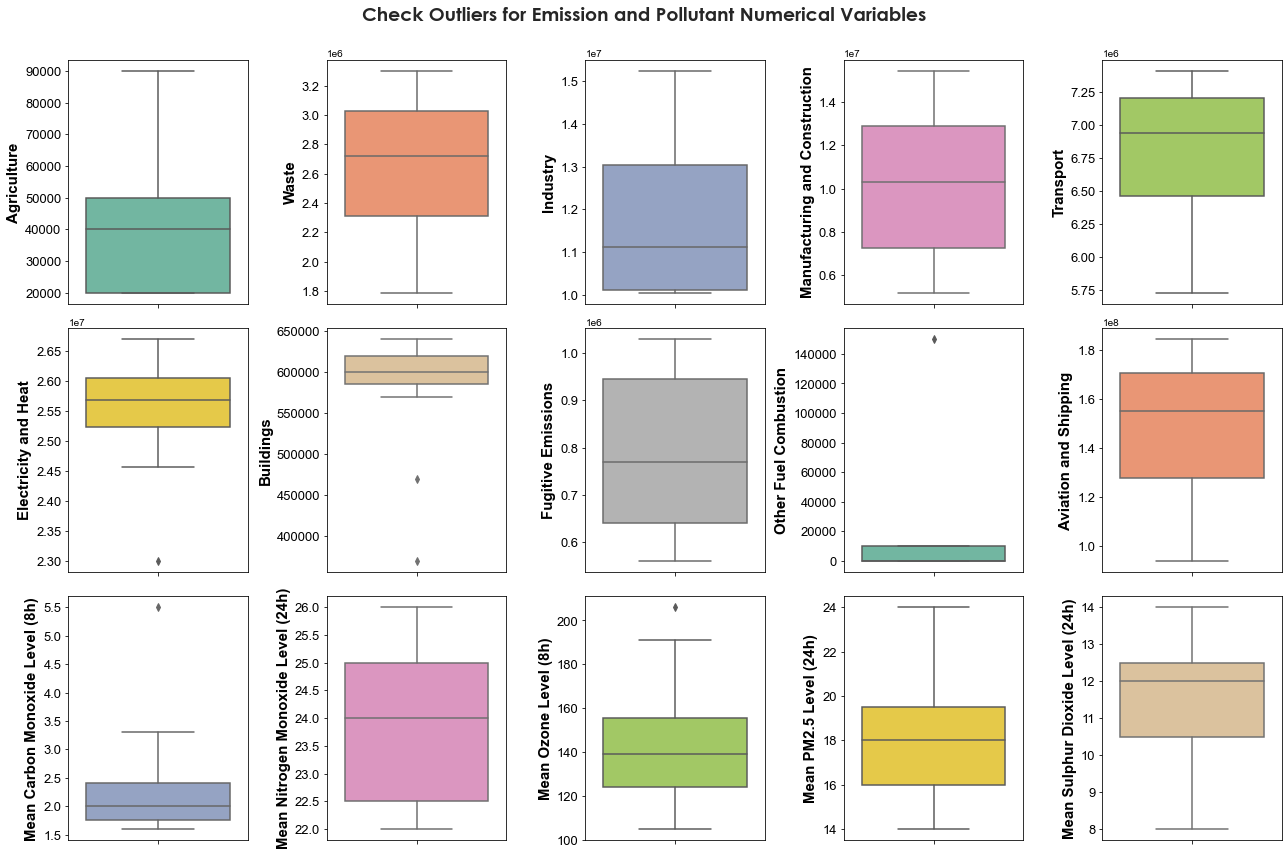

In [20]:
# Using graphical analysis to identify any outliers within the dataset in order to remove for Emissions Data
fig, axMany = plt.subplots(4,5, figsize=(18,15))
# Let number of rows be 0
rowCount = 0
# Let number of columns be 0
columnCount = 0

palette = sns.color_palette("Set2")
sns.set_style("white")

for i, item in enumerate(finalDataset.iloc[:,4:20].drop(columns=['Annual CO2 Emissions']).columns):
    sns.boxplot(y = finalDataset.iloc[:,4:20].drop(columns=['Annual CO2 Emissions'])[item], ax = axMany[rowCount][columnCount], color=palette[i % len(palette)])
    # Loop through the columns in the dataframe
    columnCount = columnCount + 1
    if columnCount % 5 == 0:
        columnCount = 0
        rowCount = rowCount + 1
        
# Remove any unused grids
for i in range(rowCount, 4):
    for j in range(columnCount, 5):
        fig.delaxes(axMany[i][j])
        
# Change font size of axis labels and axis ticks
for ax in axMany.flatten():
    ax.set_ylabel(ax.get_ylabel(), fontsize=15, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=13)

# Create a compact view of the graphs
plt.tight_layout()
plt.rcParams['font.family'] = 'Century Gothic'
plt.suptitle("Check Outliers for Emission and Pollutant Numerical Variables", y=1.03, fontsize = 19, fontweight='bold')
plt.show()

### IDENTIFYING OF OUTLIERS USING INTERQUARTILE RANGE
To identify the specific values of the outliers, identify the quantiles Q1 and Q3 to set as lower quartile and upper quartile values.

Create a detect_outliers_iqr function to check for specific outlier values.

If a value falls below Q1 or goes beyond Q3, it will be considered an outlier.


In [21]:
# Create and define a detect_outliers_iqr function to retrieve outliers if they fall beyond the IQR

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][[column]]
    return outliers

columns = finalDataset.drop(columns=['Year']).columns

print("Identify the Row and Value of the Outlier:\n")

for column in columns:
    outliers = detect_outliers_iqr(finalDataset, column)
    if not outliers.empty:
        print(f"--------------------------------------------\nColumn Name: {column}\n--------------------------------------------")
        for i, row in outliers.iterrows():
            print(f"Row Value: {i}\nOutlier Value: {row[0]}\n")

Identify the Row and Value of the Outlier:

--------------------------------------------
Column Name: Electricity and Heat
--------------------------------------------
Row Value: 7
Outlier Value: 23000000.0

--------------------------------------------
Column Name: Buildings
--------------------------------------------
Row Value: 3
Outlier Value: 370000.0047683716

Row Value: 4
Outlier Value: 469999.9988079071

--------------------------------------------
Column Name: Other Fuel Combustion
--------------------------------------------
Row Value: 3
Outlier Value: 150000.00596046448

--------------------------------------------
Column Name: Mean Carbon Monoxide Level (8h)
--------------------------------------------
Row Value: 11
Outlier Value: 5.5

--------------------------------------------
Column Name: Mean Ozone Level (8h)
--------------------------------------------
Row Value: 5
Outlier Value: 206



### FINDING OUT NORMALITY OF VARIABLES IN THE DATASET
Using Statsmodel, a Quantile-Quantile plot is used to assess if GDP, PPP , Annual CO2 Emissions , Renewables (% Equivalent Primary Energy) , Low-Carbon Energy Per Capita follow a normal distribution or if there is skewness in the data.

- The QQ-plots show that the Renewables and Low-Carbon Energy data is less normally distributed compared to GDP, PPP and Annual CO2 Emissions. 
- This suggests a slight skewness in the data for Renewables and Low-Carbon Energy as the points deviate from the line and form a slight curve.
- However, with reference to detect_outliers_iqr function, there are no outlier values for Renewables and Low-Carbon Energy Data. 


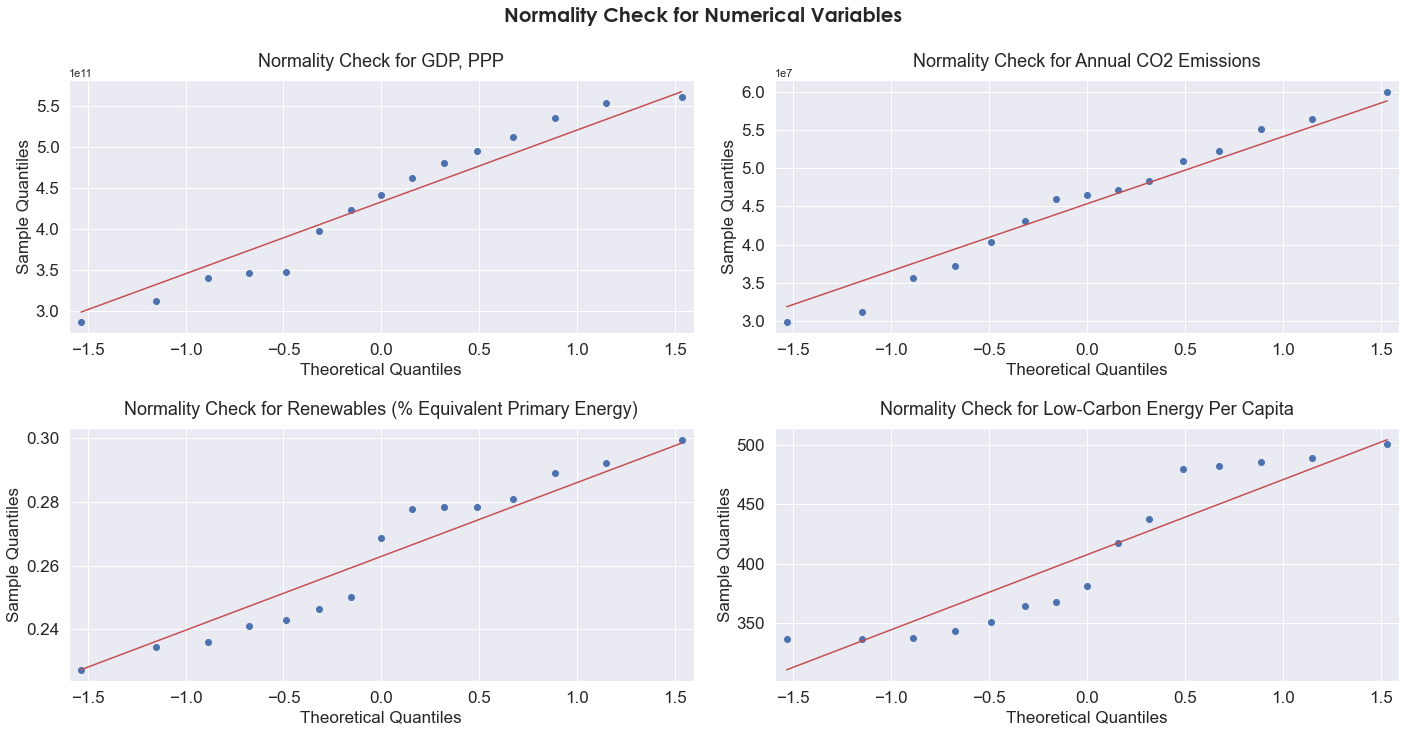

In [61]:
#  Observe the normality for variables in the dataset

fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.set_style("whitegrid")

# Distribution of GDP
sm.qqplot(finalDataset['GDP, PPP'], line = 's', ax=ax[0,0])
ax[0,0].set_title('Normality Check for GDP, PPP', y = 1.03, fontsize=18)
ax[0,0].tick_params(axis='both', which='major', labelsize=17)
ax[0,0].set_xlabel('Theoretical Quantiles', fontsize = 17)
ax[0,0].set_ylabel('Sample Quantiles', fontsize = 17)

# Distribution of Annual CO2 Emissions
sm.qqplot(finalDataset['Annual CO2 Emissions'], line = 's', ax = ax[0,1])
ax[0,1].set_title('Normality Check for Annual CO2 Emissions', y = 1.03, fontsize=18)
ax[0,1].tick_params(axis='both', which='major', labelsize=17)
ax[0,1].set_xlabel('Theoretical Quantiles', fontsize = 17)
ax[0,1].set_ylabel('Sample Quantiles', fontsize = 17)


# Distribution of Renewable Energy
sm.qqplot(finalDataset['Renewables (% Equivalent Primary Energy)'], line = 's', ax=ax[1,0])
ax[1,0].set_title('Normality Check for Renewables (% Equivalent Primary Energy)', y = 1.03, fontsize=18)
ax[1,0].tick_params(axis='both', which='major', labelsize=17)
ax[1,0].set_xlabel('Theoretical Quantiles', fontsize = 17)
ax[1,0].set_ylabel('Sample Quantiles', fontsize = 17)


# Distribution of Low-Carbon Energy Per Capita
sm.qqplot(finalDataset['Low-Carbon Energy Per Capita (kWh)'], line = 's', ax=ax[1,1])
ax[1,1].set_title('Normality Check for Low-Carbon Energy Per Capita', y = 1.03, fontsize=18)
ax[1,1].tick_params(axis='both', which='major', labelsize=17)
ax[1,1].set_xlabel('Theoretical Quantiles', fontsize = 17)
ax[1,1].set_ylabel('Sample Quantiles', fontsize = 17)

# Layout of the subplots
plt.tight_layout(pad=2)
plt.rcParams['font.family'] = 'Century Gothic'
plt.suptitle('Normality Check for Numerical Variables', y=1.03, fontsize='20', fontweight='bold')
plt.show()

### IDENTIFYING SKEWNESS IN NUMERICAL COLUMNS
- Using pandas function .skew(), identify and calculate the skewness of values in each column in the merged dataframe.
- If the value returned is negative, it means there are more values located at the lower end of the dataset (negative skew).
- If the value returned is positive, it means there are more values located at the upper end of the dataset (positive skew).

In [30]:
# Retrieve numerical columns except 'Year' and identify level of skewness for values in the column

print("Investigating the Skewness of values in Numerical Columns:\n------------------------------------------------------\n")

for value in finalDataset.select_dtypes(include = 'number').columns[1:]:
    if (finalDataset.loc[:, value].sum() != 0):
        skew = ' [Values are negatively-skewed.]\n'
        if (finalDataset.loc[:, value].skew() > 0):
            skew = ' [Values are positively-skewed.]\n'
        print(value + "'s level of skewness: " + str(finalDataset.loc[:, value].skew()) + skew)

Investigating the Skewness of values in Numerical Columns:
------------------------------------------------------

GDP, PPP's level of skewness: -0.1363298067255041 [Values are negatively-skewed.]

Renewables (% Equivalent Primary Energy)'s level of skewness: -0.01649931636778786 [Values are negatively-skewed.]

Low-Carbon Energy Per Capita (kWh)'s level of skewness: 0.3005264637799095 [Values are positively-skewed.]

Agriculture's level of skewness: 0.9767883342876703 [Values are positively-skewed.]

Waste's level of skewness: -0.42689613959861855 [Values are negatively-skewed.]

Industry's level of skewness: 0.7282981630224662 [Values are positively-skewed.]

Manufacturing and Construction's level of skewness: -0.30924905718010226 [Values are negatively-skewed.]

Transport's level of skewness: -0.8162971200912457 [Values are negatively-skewed.]

Electricity and Heat's level of skewness: -1.6688676702505219 [Values are negatively-skewed.]

Buildings's level of skewness: -2.33592673978

In [32]:
# Graph 1 : Stacked Bar Chart - Investigate the proportion of carbon emissions across different sectors in Singapore

# Extract the data required for the graph
dataRequired = finalDataset.iloc[:,4:14]
# Rearrange the columns in the dataset
dataRequired = dataRequired[['Aviation and Shipping', 'Electricity and Heat', 'Transport', 'Manufacturing and Construction', 'Industry', 'Waste', 'Agriculture', 'Fugitive Emissions', 'Buildings', 'Other Fuel Combustion']]
print("First 5 Entries for the data on Carbon Emissions by Sector:\n---------------------------")
dataRequired.reset_index().drop(columns='index').head()

First 5 Entries for the data on Carbon Emissions by Sector:
---------------------------


,Aviation and Shipping,Electricity and Heat,Transport,Manufacturing and Construction,Industry,Waste,Agriculture,Fugitive Emissions,Buildings,Other Fuel Combustion
0,9.392000e+07,2.568000e+07,5.730000e+06,5.190000e+06,1.013000e+07,1.790000e+06,79999.998212,560000.002384,370000.004768,150000.00596
1,1.040900e+08,2.554000e+07,5.950000e+06,5.440000e+06,1.011000e+07,1.940000e+06,90000.003576,579999.983311,469999.998808,0.00000
2,1.146600e+08,2.605000e+07,6.150000e+06,5.740000e+06,1.010000e+07,2.090000e+06,70000.000298,600000.023842,579999.983311,0.00000
3,1.256500e+08,2.584000e+07,6.270000e+06,5.960000e+06,1.008000e+07,2.240000e+06,59999.998659,629999.995232,589999.973774,0.00000
4,1.298500e+08,2.300000e+07,6.860000e+06,8.590000e+06,1.006000e+07,2.390000e+06,39999.999106,649999.976158,620000.004768,0.00000


### GRAPH 1 : PROPORTION OF CARBON EMISSIONS ACROSS DIFFERENT SECTORS
- Of all the sectors in Singapore, ‘Aviation and Shipping’ contributes the most to carbon emissions and ‘Other Fuel Combustion’ contributes the least.

- This could be because aviation and shipping are used for long-distance travels and require large amounts of fuel, which produces significant amounts of emissions into the atmosphere.

- While the overall emission levels have trended upwards, a gradual but steady decrease has been observed starting from 2017, which could be a result of a sharper rise in usage of low-carbon energy, hence slightly reducing overall emissions.


Percentage of Carbon Emissions By Sector(%):
---------------------------------------------------
                           Sector  Emissions By Sector (%)
0           Aviation and Shipping                71.693542
1            Electricity and Heat                12.353025
2                       Transport                 3.295798
3  Manufacturing and Construction                 4.999096
4                        Industry                 5.686164
5                           Waste                 1.284337
6                     Agriculture                 0.019381
7              Fugitive Emissions                 0.380843
8                       Buildings                 0.281676
9           Other Fuel Combustion                 0.006137


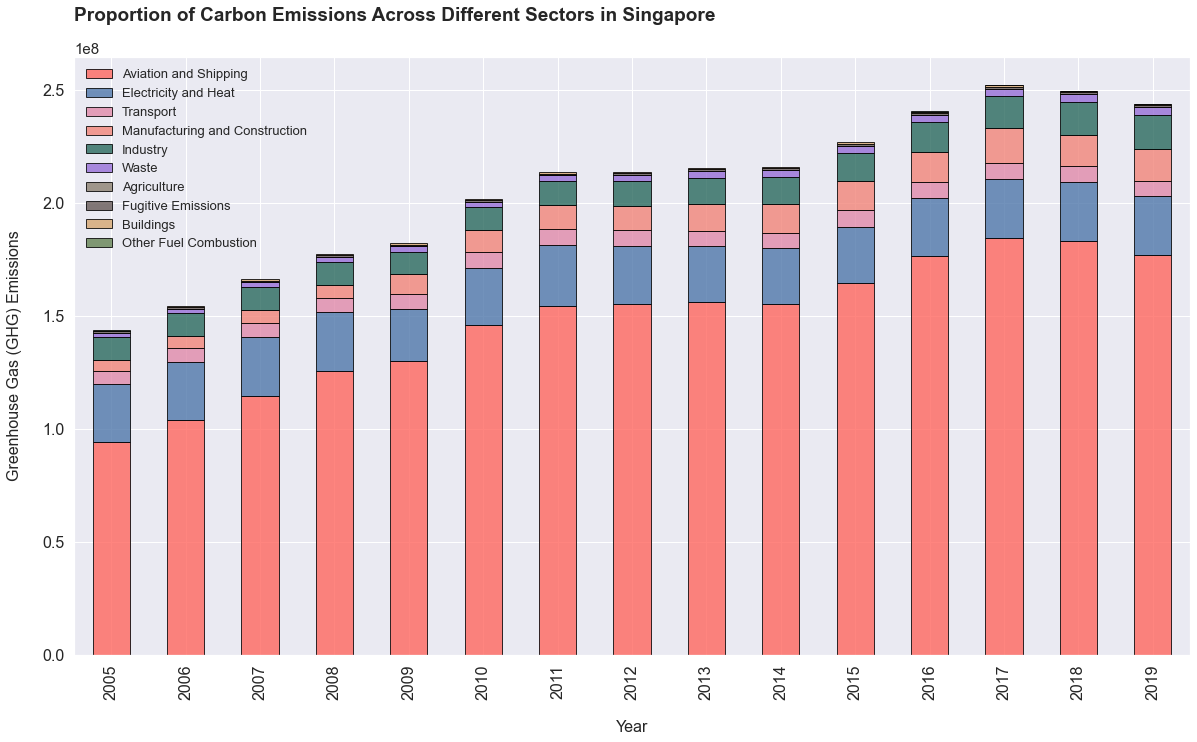

In [60]:
# Graph 1 : Stacked Bar Chart - Proportion of carbon emissions across different sectors in Singapore

# Specifying the values and labels of the bar chart
totalEmissionBySector = dataRequired.sum(axis = 0)
totalEmissions = totalEmissionBySector.sum()

# Get the sum of emissions by sector
emissionValues = []
for i in range(len(totalEmissionBySector)):
    values = (totalEmissionBySector.iloc[i] / totalEmissions) * 100
    emissionValues.append(values)
    
# Percentage of Carbon Emission By Sector
descriptionOfEmission = pd.DataFrame({'Sector': dataRequired.columns.values, 'Emissions By Sector (%)': emissionValues})
print(f'Percentage of Carbon Emissions By Sector(%):\n---------------------------------------------------\n{descriptionOfEmission}')

# Setting the seaborn styles and colors for the bar chart
colors = ['#FF675F', '#4F77AA', '#E18AAA', '#F28579', '#2A695E', '#976ED7', '#8D8171', '#665957', '#D5A670', '#658354']
sns.set(rc = {'figure.figsize':(20,11)})
sns.set_context("notebook", rc={"font.family":"Century Gothic"})

# Plotting the stacked bar chart
ax = dataRequired.plot(kind = 'bar', stacked = True, alpha = 0.8, color = colors, edgecolor = 'Black')

# Customising the graph axes and ticklabels
plt.xlabel('Year', fontsize=16, labelpad = 20)
plt.ylabel('Greenhouse Gas (GHG) Emissions', fontsize=16, labelpad = 20)
ax.tick_params(axis='both', which='major', labelsize = 16)
ax.set_xticklabels(range(2005,2020)) # Changing the x-axis ticklabels to years
ax.yaxis.offsetText.set_fontsize(15)

# Displaying the legend and title for the chart
plt.legend(frameon = False, prop={'size': 13}, loc='upper left')
plt.title("Proportion of Carbon Emissions Across Different Sectors in Singapore", fontsize=19, y = 1.05, fontweight='bold', loc='left')
plt.show()

### GRAPH 2 : CHANGES IN LOW-CARBON ENERGY & RENEWABLE ENERGY OVER TIME
- Based on the dual y-axis line charts, there has been an overall increase in the usage of low-carbon energy and renewable energy over the years.

- This indicates that a transition towards cleaner energy sources has taken place, likely driven by the need to decrease carbon emissions from various sectors, especially ‘Aviation and Shipping’, which in turn may be aided by economic growth.

- As Singapore has a major carbon footprint due to urbanization,  it is now on ‘a timer to decarbonize the power sector’. (Business Times, 2021).


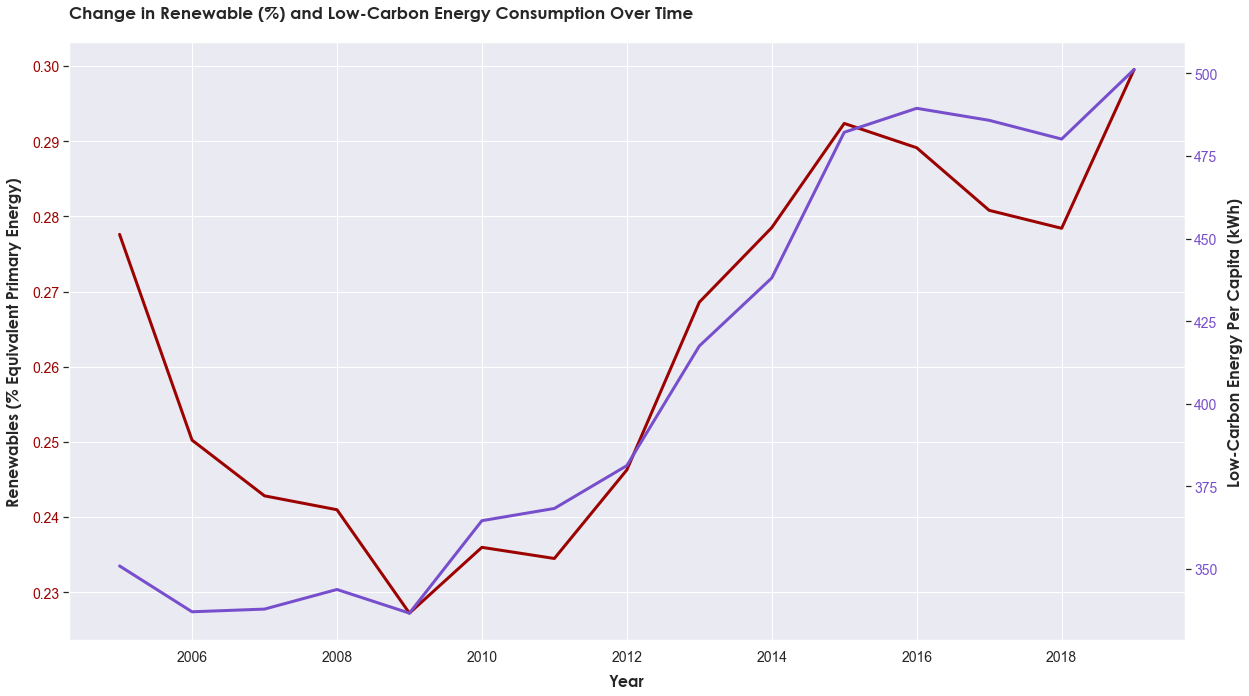

In [43]:
# Graph 2 : Changes in low-carbon energy and renewable energy over time

# Plotting a subplot line chart
fig, ax = plt.subplots()
sns.set_style("darkgrid")

# Line Chart for Renewable Energy
sns.lineplot(x='Year', y='Renewables (% Equivalent Primary Energy)', data=finalDataset, color='#9B0200', linewidth=3, ax=ax)
ax.set_ylabel('Renewables (% Equivalent Primary Energy)', labelpad=10, fontdict={'family':'Century Gothic', "fontsize":"16", "fontweight":"bold"})
ax.set_xlabel('Year', labelpad=10, fontdict={'family':'Century Gothic', "fontsize":"16", "fontweight":"bold"})
ax.tick_params(axis='y', labelcolor='#9B0200', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax2=ax.twinx()

# Line Chart for Low-Carbon Energy
sns.lineplot(x='Year', y='Low-Carbon Energy Per Capita (kWh)', data=finalDataset, color='#774ECC', linewidth=3, ax=ax2)
ax2.set_ylabel('Low-Carbon Energy Per Capita (kWh)', labelpad=10, fontdict={'family':'Century Gothic', "fontsize":"16", "fontweight":"bold"})
ax2.tick_params(axis='y', labelcolor='#774ECC', labelsize=14)
ax2.yaxis.grid(False, which='both')

plt.title("Change in Renewable (%) and Low-Carbon Energy Consumption Over Time", fontweight='bold', y = 1.03, 
          fontdict={'family':'Century Gothic'}, loc='left', fontsize=17)
plt.show()

### GRAPH 3 : HEATMAP FOR GDP, RENEWABLES, LOW-CARBON AND EMISSION DATA
- The heatmap shows a strong positive correlation between GDP, PPP and both Low-Carbon Energy and Renewables Energy, indicating that economic growth is a driving force behind the shift towards cleaner energy sources, which have increased over time.

- A negative correlation of -0.27 is found between GDP, PPP and Annual CO2 Emissions, demonstrating that as the economy grows and the shift towards low-emission energies continues, CO2 emissions decrease.

- Additionally, there is a negative correlation between Annual CO2 Emissions and both Renewable Energy and Low-Carbon Energy, indicating that the use of cleaner energy sources can reduce carbon emissions and have some impact on overall emission levels.

Pearson Correlation Levels :
---------------------------
Renewables (% Equivalent Primary Energy) and GDP, PPP : 0.67
Low-Carbon Energy Per Capita (kWh) and GDP, PPP : 0.94
Annual CO2 Emissions and GDP, PPP : -0.27


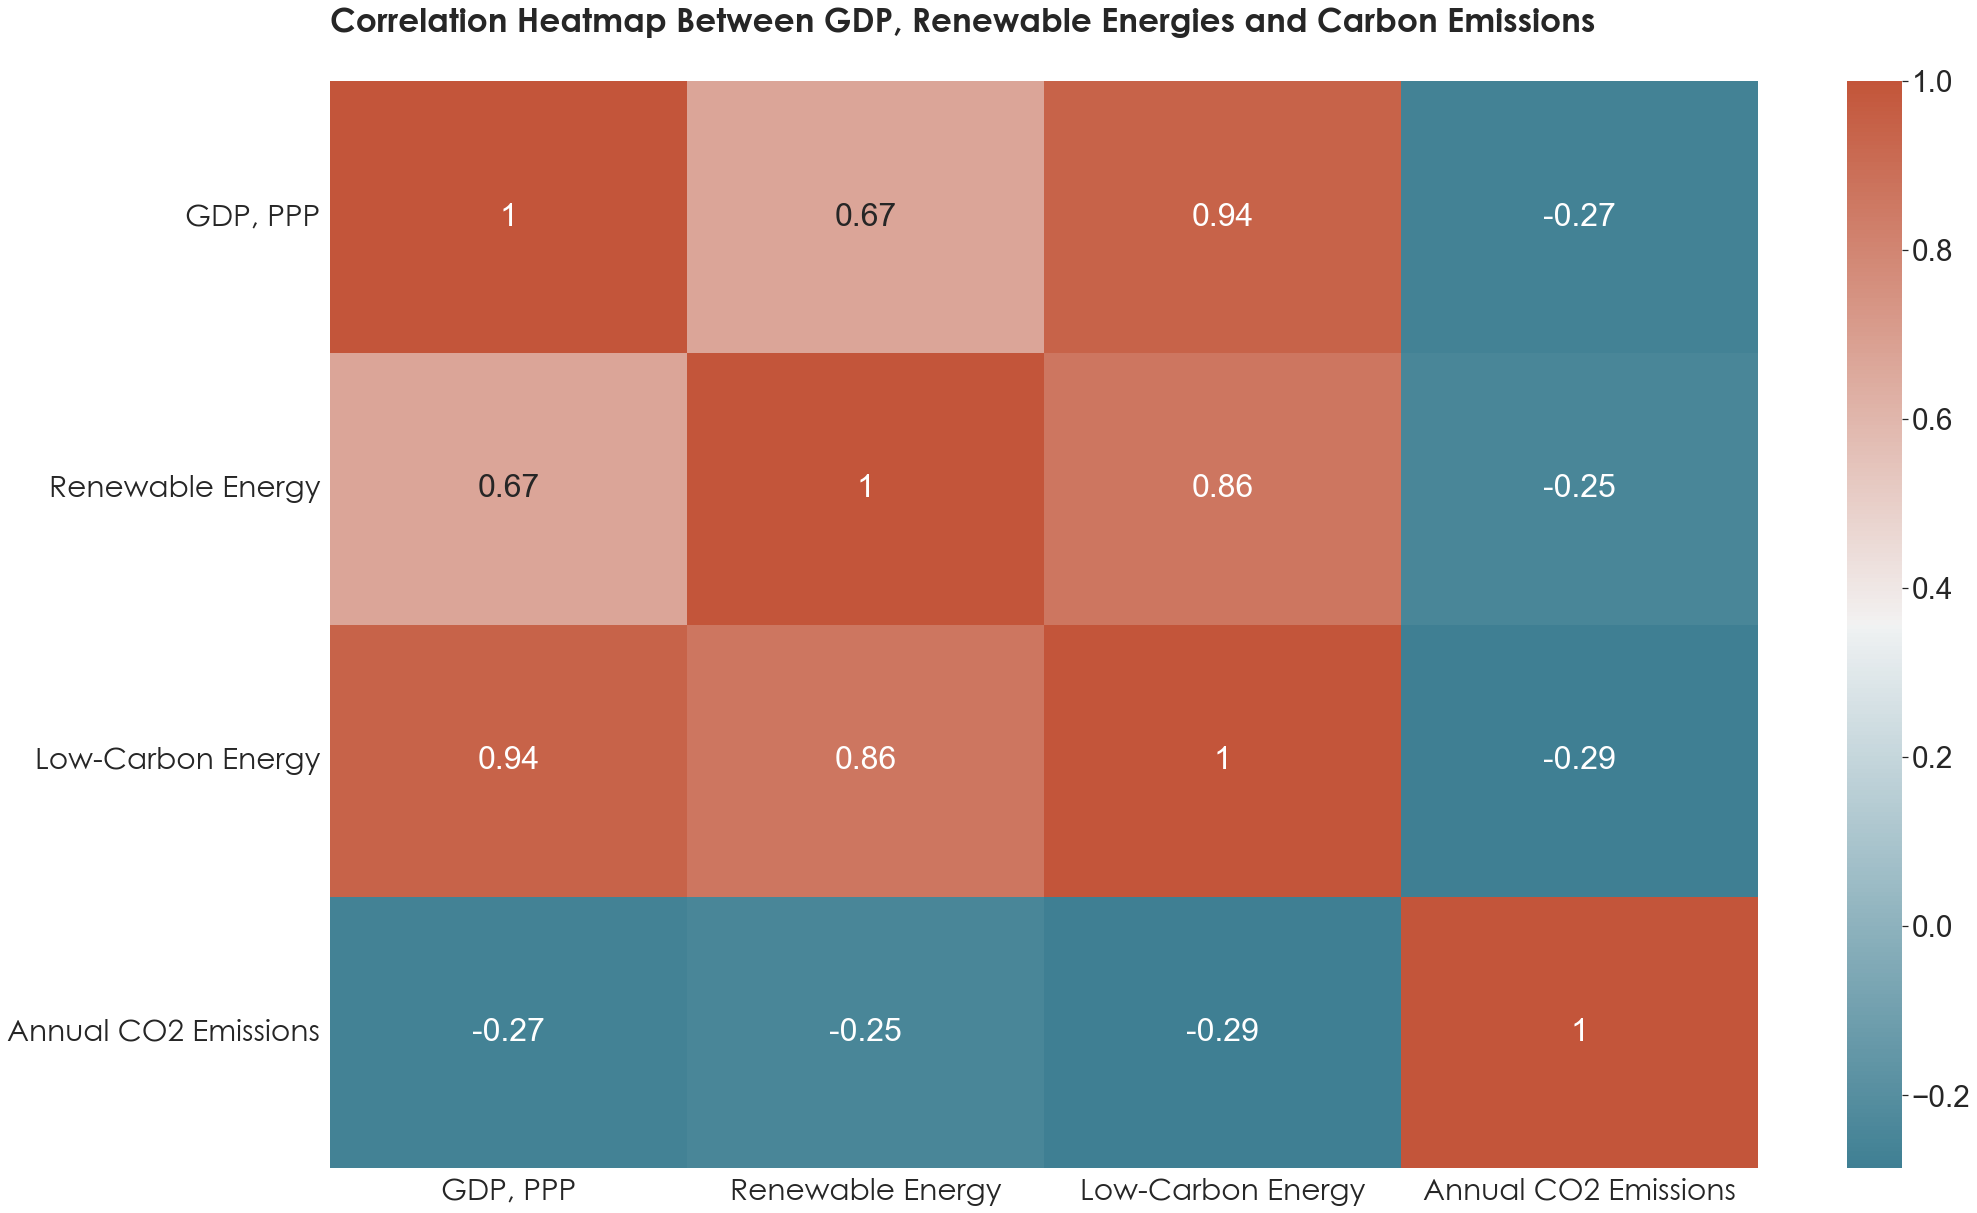

In [45]:
# Graph 3 : Investigating the correlation levels between GDP, Renewables, Low-Carbon and Annual CO2 Emissions

# Set the size and scale of the correlation heatmap
f, ax = plt.subplots(figsize=(32, 20))
sns.set(font_scale=2.7)

# Selecting the columns to be used for the heatmap
correlationColumns = finalDataset.loc[:, 
    ['GDP, PPP', 'Renewables (% Equivalent Primary Energy)','Low-Carbon Energy Per Capita (kWh)', 'Annual CO2 Emissions']]

# Use Pearsons Correlation Test to Display Various Correlation Levels
print("Pearson Correlation Levels :\n---------------------------")
target_col = 'GDP, PPP'
correlationColumns = finalDataset[correlationColumns.columns]
corr_matrix = correlationColumns.corr()
# Extract the correlation of target column with each column
target_corrs = corr_matrix[target_col].drop(target_col)

# Print the correlation
for col, corr in target_corrs.items():
    print(f'{col} and {target_col} : {corr:.2f}')
    
# Change column names
correlationColumns.columns = ['GDP, PPP', 'Renewable Energy', 'Low-Carbon Energy', 'Annual CO2 Emissions']

# Customising a diverging palette for the color display of the heatmap 
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap and displaying the correlation values
sns.heatmap(correlationColumns.corr(), annot=True, cmap=cmap, annot_kws={'size': 32})
plt.rcParams['font.family'] = 'Century Gothic'
plt.title('Correlation Heatmap Between GDP, Renewable Energies and Carbon Emissions', y = 1.04, fontweight='bold', fontsize=33, loc='left')
plt.show()

### GRAPH 4 : REGRESSION OF CO2 EMISSIONS AGAINST RENEWABLE AND LOW-CARBON ENERGY SOURCES
- The regression plot shows a polynomial relationship between the Annual CO2 Emissions (the dependent factor) and Low-Carbon Energy and Renewable Energy (the independent factors). 

- The inverted relationship indicated by the upside-down curve in the plot suggests that while CO2 emissions initially decrease with an increase in low-carbon and renewable energy, but they start to rise again beyond a certain point. 

- This could be because of the insufficiencies of low-carbon energy sources in meeting the energy demand, hence still resulting in a greater reliance on CO2-emitting energy sources.

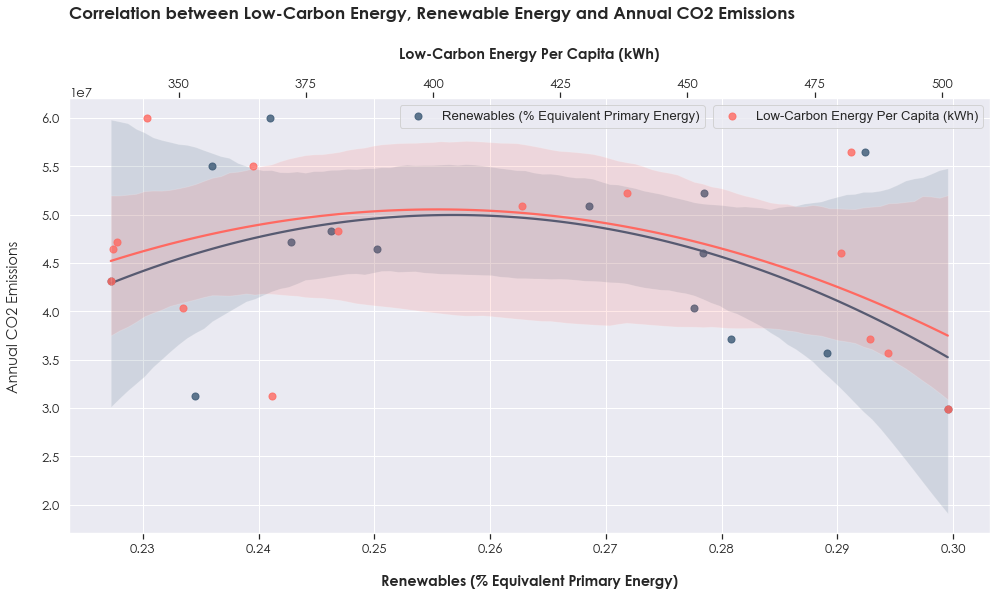

In [47]:
# Graph 4 : Regression Plot - Relationship between low-carbon energy, renewable energy and carbon emissions
# Plot the regression plot
ax = sns.regplot(data=finalDataset, x = 'Renewables (% Equivalent Primary Energy)', y='Annual CO2 Emissions', color='#3A5874', 
                 scatter_kws={'s':50}, label = 'Renewables (% Equivalent Primary Energy)', order=2)
# Double x-axes for low-carbon and renewable energy
ax2 = plt.twiny()
ax2 = sns.regplot(data=finalDataset, x = 'Low-Carbon Energy Per Capita (kWh)', y='Annual CO2 Emissions', color='#FF6961', 
                  scatter_kws={'s':50}, label = 'Low-Carbon Energy Per Capita (kWh)', order=2)

# Customising the regression plot
sns.set(rc={'figure.figsize':(16.5,8)})
sns.set(font_scale = 1.2)
# Increasing the space between axis labels and axis ticks
ax.set_xlabel('Renewables (% Equivalent Primary Energy)', labelpad = 20, fontweight='bold')
ax2.set_xlabel('Low-Carbon Energy Per Capita (kWh)', labelpad=20, fontweight='bold')
ax.set_ylabel('Annual CO2 Emissions', labelpad=20)

# Setting the legends for the graph
ax.legend(bbox_to_anchor=(0.352, 1))
ax2.legend()
ax2.xaxis.grid(False, which='both')

# Setting the title
plt.rcParams['font.family'] = 'Century Gothic'
plt.title("Correlation between Low-Carbon Energy, Renewable Energy and Annual CO2 Emissions", fontsize=17, y = 1.17, 
          fontweight='bold', loc='left')
plt.show()

### STATISTICAL SUMMARY OF REGRESSION ANALYSIS

- According to the regression plot, this linear regression model proves the non-linear relationship from the graph.

- When emissions levels are compared to Low-Carbon Energy per capita, there is a low adjusted R-square value of 0.011, indicating that there is no strong linear relationship between the two variables.

- The existence of a non-linear relationship between emissions and low-carbon energy levels could be due to Singapore's limited use of clean energy sources for power and energy generation. 

- Although the increase in clean energy consumption helps lower emissions, the insufficient amount leads to an increase in emissions due to the energy demand, thereby indicating that relying solely on low-carbon energy may not be enough to reduce emissions.


In [48]:
# Statistical Summaries of Linear Regression between Annual CO2 Emissions and Low-Carbon Energy
regressionAnalysis = finalDataset[['Annual CO2 Emissions', 'Low-Carbon Energy Per Capita (kWh)']]
regressionAnalysis.columns = ['annual_co2_emissions', 'low_carbon_energy_percap']
regressionModel = sm.OLS.from_formula("annual_co2_emissions ~ low_carbon_energy_percap", data=regressionAnalysis).fit()
modelPredicts = regressionModel.predict() 
print(f'Linear Regression Analysis Model: Emission Levels\n----------------------------\n{regressionModel.params}')
print(regressionModel.summary())

Linear Regression Analysis Model: Emission Levels
----------------------------
Intercept                   6.156947e+07
low_carbon_energy_percap   -3.981984e+04
dtype: float64
                             OLS Regression Results                             
Dep. Variable:     annual_co2_emissions   R-squared:                       0.082
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     1.160
Date:                  Mon, 06 Feb 2023   Prob (F-statistic):              0.301
Time:                          23:18:45   Log-Likelihood:                -260.45
No. Observations:                    15   AIC:                             524.9
Df Residuals:                        13   BIC:                             526.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
              

C:\Users\dario\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### TRANSFORMING DATA USING PANDAS FOR AIR POLLUTANTS

1. Use <b>finalDataset.iloc [ ]</b> to retrieve columns relating to air pollutant data, and store in a variable ‘pollutantData’


2. Append the column ‘Year’ to ‘pollutantData’ using pd.concat() and use indexing .columns [-1] to place ‘Year’ as the first column. Specify axis = 1 to refer to rows.


3. Convert the 8-hour mean pollutant values for Carbon Monoxide and Ozone to its 24-hour mean values by using its conversion factor and use round() to round to 1 decimal place.


4. Rename the columns with 8h pollutant values to 24h values using pandas function : pollutantData.rename() 



In [49]:
# Transforming the data for air pollutants

# Retrieve the columns of data involving air pollutant levels, storing into a new variable : pollutantData

pollutantData = finalDataset.iloc[:,15:20]
pollutantData['Year'] = finalDataset['Year']

# Rearranging the 'Year' column to be the first column in the dataframe using pd.concat
last_col = pollutantData.columns[-1]
pollutantData = pd.concat([pollutantData[last_col], pollutantData.drop(last_col, axis=1)], axis=1)

# Conversion of the 8-hour mean pollutant values to 24-hour mean
pollutantData[['Mean Carbon Monoxide Level (8h)']] = round(pollutantData[['Mean Carbon Monoxide Level (8h)']].mul(1.56), 1) # Carbon Monoxide
pollutantData[['Mean Ozone Level (8h)']] = round(pollutantData[['Mean Ozone Level (8h)']].mul(1.2), 1) # Ozone

# Alter the column names to all 24h mean values
pollutantData = pollutantData.rename(columns = {'Mean Carbon Monoxide Level (8h)': 'Mean Carbon Monoxide Level (24h)', 
                                                'Mean Ozone Level (8h)': 'Mean Ozone Level (24h)'})

pollutantData = pollutantData.reset_index().drop(columns='index')
pollutantData.head()

,Year,Mean Carbon Monoxide Level (24h),Mean Nitrogen Monoxide Level (24h),Mean Ozone Level (24h),Mean PM2.5 Level (24h),Mean Sulphur Dioxide Level (24h)
0,2005,3.7,25,190.8,21,14
1,2006,4.1,24,163.2,23,11
2,2007,2.7,22,247.2,19,12
3,2008,2.5,22,219.6,16,11
4,2009,3.0,22,126.0,19,9


### RESHAPING DATAFRAME STRUCTURE FOR AIR POLLUTANTS

- Use pandas .melt to gather columns into rows, transforming the data to <b>long-format</b>.
	- id_vars :  ‘Year’ column should be kept as identifier.
	- var_name : Original column headers under a variable name ‘Pollutant’.
	- value_name: Name of the new column in the melted DataFrame that will contain the pollution values.
    
    
- Instead of having individual columns for each of the pollutants, group the values according to year instead and arranged according to its pollutant type.


In [50]:
# Graph 5 : Area Chart - Investigates the changes in amount of air pollutants by year

# To produce the area chart for each pollutant in small multiples, reshaping is needed
# Reshape the DataFrame to long format using melt()
transformedPollutantData = pollutantData.melt(id_vars=['Year'], var_name='Pollutant', value_name='Mean_Pollution_Level')

print("\nReshaped DataFrame:")
transformedPollutantData


Reshaped DataFrame:


,Year,Pollutant,Mean_Pollution_Level
0,2005,Mean Carbon Monoxide Level (24h),3.7
1,2006,Mean Carbon Monoxide Level (24h),4.1
2,2007,Mean Carbon Monoxide Level (24h),2.7
3,2008,Mean Carbon Monoxide Level (24h),2.5
4,2009,Mean Carbon Monoxide Level (24h),3.0
...,...,...,...
70,2015,Mean Sulphur Dioxide Level (24h),12.0
71,2016,Mean Sulphur Dioxide Level (24h),13.0
72,2017,Mean Sulphur Dioxide Level (24h),12.0
73,2018,Mean Sulphur Dioxide Level (24h),9.0


### GRAPH 5 : AREA CHART TO MEASURE CHANGE IN AMOUNT OF AIR POLLUTANTS BY YEAR
- The area charts reveal a consistent pattern in air pollutant levels over time, without any substantial rise or fall. 

- This implies that the implementation of renewable and low-carbon energy sources has not had a significant effect on improving air quality and reducing pollutants in the atmosphere. 

- Given the unchanging nature of air pollutants, more comprehensive and proactive measures are required to effectively improve air quality, instead of relying only on the shift towards cleaner energy sources.


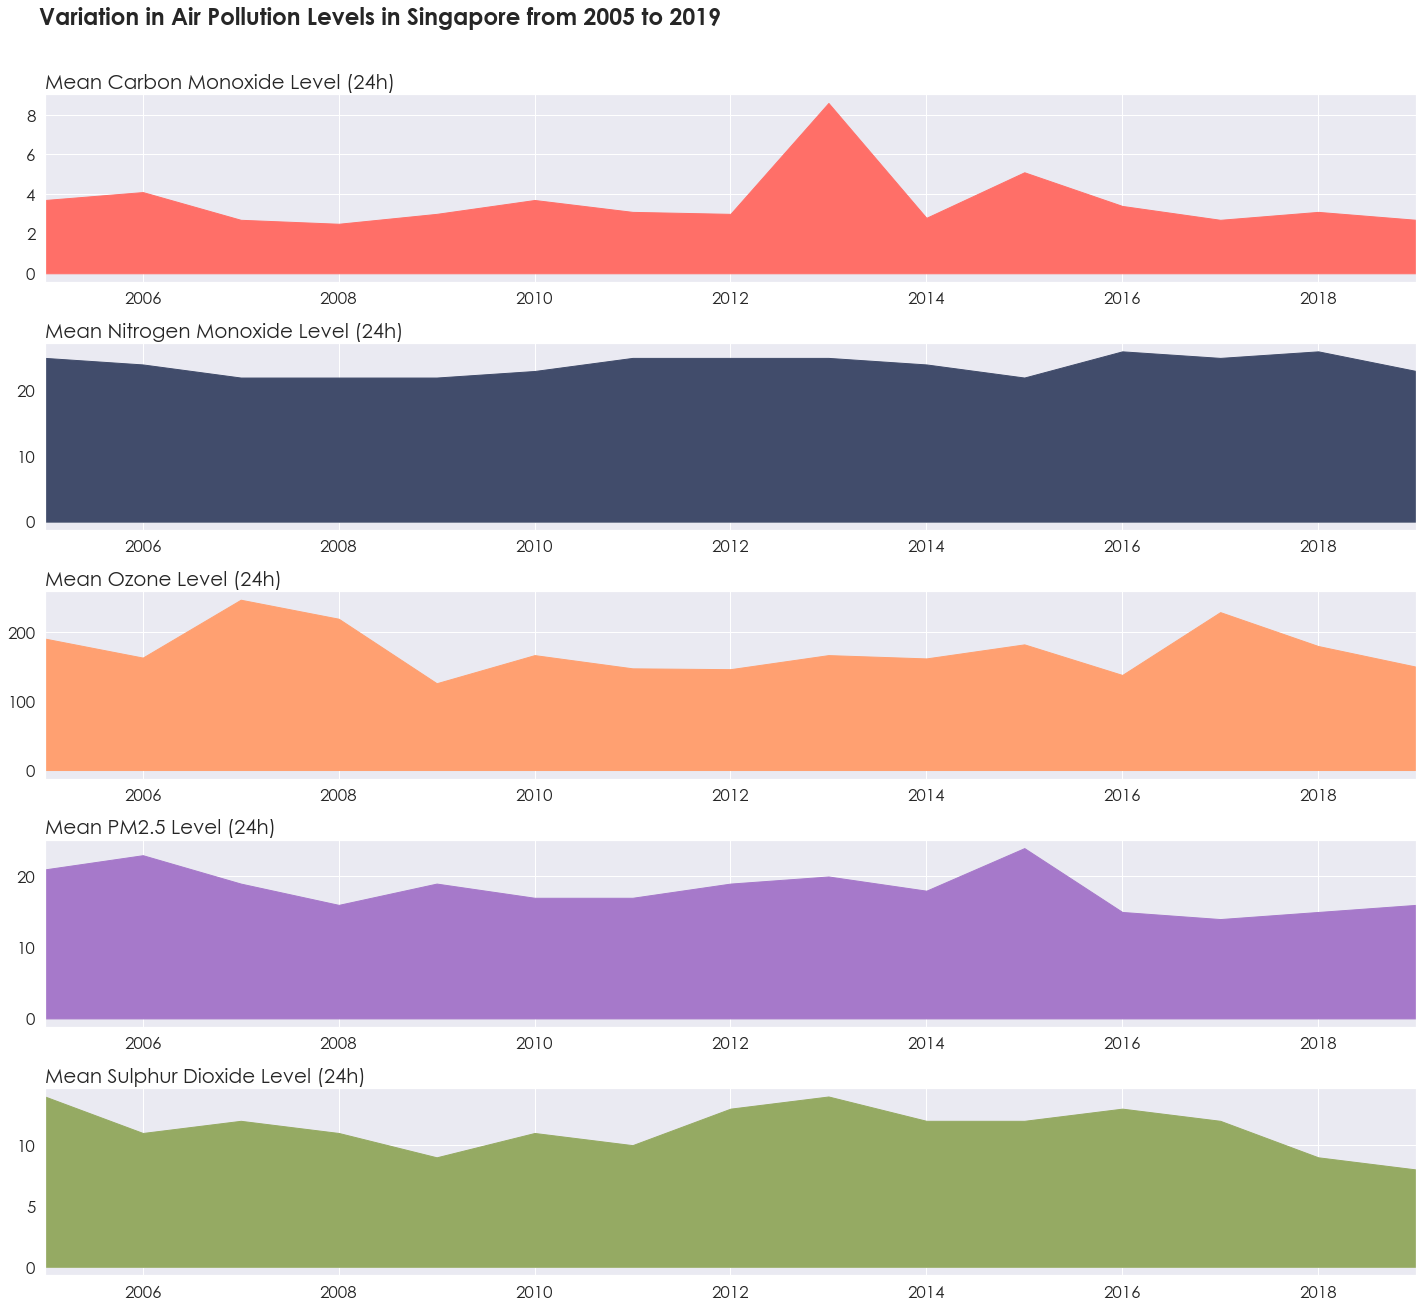

In [55]:
# Graph 5 : Area Chart - Investigates the changes in amount of air pollutants by year

# Creating subplots for the area chart
pollutants = transformedPollutantData.Pollutant.unique()
fig, ax = plt.subplots(len(pollutants),1, figsize=(20,18))

# Setting the colors for the subplots
colors = ['#FF6F68','#414C6B','#FFA071','#A679CA','#95AA63']

for i, pollutant in enumerate(pollutants):
    # Retrieve the respective data rows with its values belonging to the specified pollutant
    data = transformedPollutantData[transformedPollutantData.Pollutant == pollutant]
    ax[i].fill_between(data.Year, data.Mean_Pollution_Level, color=colors[i])
    ax[i].set_title(pollutant, fontsize=20, loc='left')
    ax[i].tick_params(axis='both', which='major', labelsize=17)
    ax[i].set_xlim(2005, 2019)

# Create a overall title for the small multiples plot
plt.suptitle("Variation in Air Pollution Levels in Singapore from 2005 to 2019", fontweight='bold', x=0.27, y=1.01, fontsize=23)
plt.rcParams['font.family'] = 'Century Gothic'
plt.tight_layout()
plt.show()

### GROUPBY() METHOD TO GROUP DATA
- Using groupby(), group the pollutant data in 'transformedPollutantData' by Pollutant and return the mean value for each pollutant type respectively.

- Using groupby(), group the pollutant data in 'transformedPollutantData' by Year and return the mean value for each year respectively.

In [56]:
# Use groupby() method to group the pollutant data by pollutant and return the mean value.
grouped_pollutantData_pollutant = transformedPollutantData.drop(columns=['Year']).groupby('Pollutant').mean()
grouped_pollutantData_pollutant

,Mean_Pollution_Level
Pollutant,
Mean Carbon Monoxide Level (24h),3.613333
Mean Nitrogen Monoxide Level (24h),23.933333
Mean Ozone Level (24h),174.400000
Mean PM2.5 Level (24h),18.200000
Mean Sulphur Dioxide Level (24h),11.400000


In [57]:
# Use groupby() method to group the pollutant data by year and return the mean value by year
grouped_pollutantData_year = transformedPollutantData.groupby('Year').mean()
grouped_pollutantData_year.reset_index(inplace = True)
grouped_pollutantData_year

,Year,Mean_Pollution_Level
0,2005,50.90
1,2006,45.06
2,2007,60.58
3,2008,54.22
4,2009,35.80
5,2010,44.30
6,2011,40.54
7,2012,41.28
8,2013,46.88
9,2014,43.76


### GRAPH 6 : BAR-LINE CHART TO INVESTIGATE TRENDS BETWEEN AIR POLLUTION, LOW-CARBON AND RENEWABLE ENERGY 
- The subplots reveal a lack of correlation between the shift towards low-carbon and renewable energy sources and changes in air pollution levels. 

- This suggests that the move towards cleaner energy generally has not had a meaningful effect on air pollution levels, as they remain unpredictable and without a discernible pattern. 

- Despite a minor reduction in air pollutant levels due to the rise in renewable energy sources from 2017, the decrease is minimal and based on past trends, may not result in further substantial improvement.

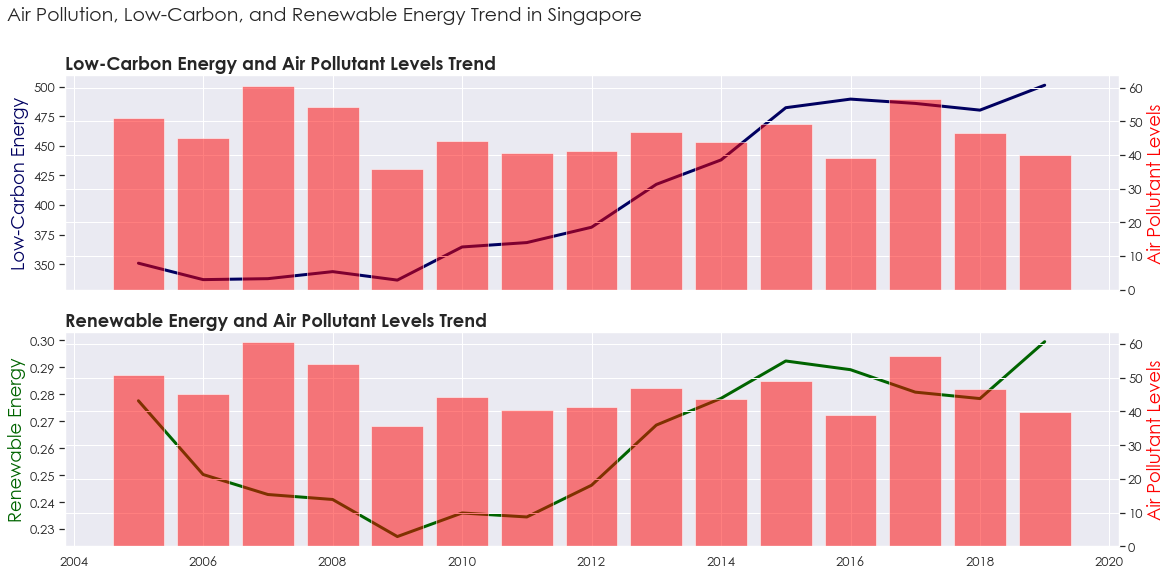

In [58]:
# Graph 6 : Bar-Line Chart - Investigate the trend between air pollutant data with low-carbon and renewable energy
fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True)

# Trend between Low-Carbon Energy and Air Pollutant Levels

ax1.set_ylabel('Low-Carbon Energy', color='#000060', fontsize=18)
ax1.plot(finalDataset['Year'], finalDataset['Low-Carbon Energy Per Capita (kWh)'], color='#000060', linewidth=3)
ax1.set_title("Low-Carbon Energy and Air Pollutant Levels Trend", fontsize=18, fontweight='bold', loc='left')

ax2 = ax1.twinx()

ax2.set_ylabel('Air Pollutant Levels', color='#FF0000',fontsize=18)
ax2.bar(grouped_pollutantData_year['Year'], grouped_pollutantData_year['Mean_Pollution_Level'], color='#FF0000', alpha=0.5)

# Trend between Renewable Energy and Air Pollutant Levels

ax3.set_ylabel('Renewable Energy', color='#006400', fontsize=18)
ax3.plot(finalDataset['Year'], finalDataset['Renewables (% Equivalent Primary Energy)'],  color='#006400', linewidth=3)
ax3.set_title("Renewable Energy and Air Pollutant Levels Trend", fontsize=18, fontweight='bold', loc='left')

ax4 = ax3.twinx()

ax4.set_ylabel('Air Pollutant Levels', color='#FF0000', fontsize=18)
ax4.bar(grouped_pollutantData_year['Year'], grouped_pollutantData_year['Mean_Pollution_Level'], color='#FF0000', alpha=0.5)

ax1.yaxis.grid(False, which='both')
ax3.yaxis.grid(False, which='both')

plt.suptitle("Air Pollution, Low-Carbon, and Renewable Energy Trend in Singapore", x=0.28, y=1.0, fontsize=19)
plt.rcParams['font.family'] = 'Century Gothic'
plt.tight_layout()
plt.show()

### SAVING THE DATASET TO CSV
Using os.path module, save the final cleansed dataset to a folder 'Final_Cleansed_Dataset_Merged' with the filename as 'finalDataset.csv'.

In [59]:
# Writing the final cleansed dataset to a CSV file in a folder
finalDataset.to_csv(os.path.join('Final_Cleansed_Dataset_Merged','finalDataset.csv'))

### BEATRICE'S CONCLUSIONS AND RECOMMENDATIONS
#### Conclusions :
- Shifting towards low-carbon and renewable energy as power sources does help reduce carbon emissions. As Singapore’s economy grows, Singapore’s investment in cleaner energy sources has increased with the aim of reducing harmful emission production.


- But the impact is not significant as the implementation of renewable energy remains limited in Singapore, as there is still a significant dependence on high-carbon energy, particularly in the aviation and shipping sector.


- The shift towards cleaner energy sources has not resulted in a significant reduction in air pollutant levels. So, simply transitioning to cleaner energy sources is not sufficient in improving air quality. Singapore cannot simply rely on renewables and low-carbon energy to improve the air quality.


#### Recommendations :
- Government : The Singapore Government should ramp up its implementation of renewable / low-carbon energy sources to generate power by increasing investments. Besides renewable / low-carbon energy, it should implement policies and incentives to encourage the transition from high to low-carbon energy sources, especially in aviation and shipping sectors.


- Public : The public should take greater ownership into supporting the use of clean energy sources and use services that prioritize sustainability. Instead of relying solely on governmental implementations of clean energy, they should implement clean energy practices in their daily lives to increase the adoption rates of cleaner energy sources, to enable a greater reduction in emission production, and to create a cleaner and less polluted environment for themselves and future generations. 

